<a href="https://colab.research.google.com/github/chase-urasaki/ADCS-Visualizations/blob/main/Attitude_Representations_Software_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.animation as animation 
from IPython.display import HTML

In [ ]:
def plot_rot(phi, theta, psi): 
  #convert to radians
  phi_rad = phi*np.pi/180; theta_rad = theta*np.pi/180; psi_rad = psi*np.pi/180
    # here's the conversion to a rotation matrix
  A_x = np.array([[1, 0, 0],
                [0, np.cos(phi_rad), -np.sin(phi_rad)], 
                [0, np.sin(phi_rad), np.cos(phi_rad)]])
  A_y = np.array([[np.cos(theta_rad), 0, np.sin(theta_rad)],
                [0, 1, 0], 
                [-np.sin(theta_rad), 0, np.cos(theta_rad)]])
  A_z = np.array([[np.cos(psi_rad), -np.sin(psi_rad), 0],
                [np.sin(psi_rad), np.cos(psi_rad), 0], 
                [0, 0, 1]])
  A = A_z @ A_y @ A_x

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.quiver(0, 0, 0, 1, 0, 0, length=1.5, linestyle = '--', normalize=True, color = '#BDBDBD') 
  ax.text(1.5, 0, 0, r'x', color = 'k')
  ax.quiver(0, 0, 0, 0, 1, 0, length=1.5, linestyle = '--', normalize=True, color = '#BDBDBD') 
  ax.text(0, 1.5, 0, r'y', color = 'k')
  ax.quiver(0, 0, 0, 0, 0, 1, length=1.5, linestyle = '--', normalize=True, color = '#BDBDBD') 
  ax.text(0, 0, 1.5, r'z', color = 'k')
  ax.set(xlim=(-1.5, 1.5), 
            ylim=(-1.1,1.5), 
            zlim=(-1.5,1.5))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

  ax.quiver(0,0,0, A[0,0] , A[0,1], A[0,2], length = 0.75, normalize = True, color = 'red') 
  ax.text(A[0,0], A[0,1], A[0,2], r"x'", color = 'red')
  ax.quiver(0,0,0, A[1,0], A[1,1], A[1,2], length = 0.75, normalize = True, color = 'orange') 
  ax.text(A[1,0], A[1,1], A[1,2], r"y'", color = 'orange')
  ax.quiver(0,0,0, A[2,0], A[2,1], A[2,2], length = 0.75, normalize = True,  color = 'blue' ) 
  ax.text(A[2,0], A[2,1], A[2,2], r"z'", color = 'blue')

  plt.show()
  plt.close()


  print("euler angle representation:")
  print("phi = "+str(phi))
  print("theta = "+str(theta))
  print("psi = "+str(psi))
  print("")
  print("rotation matrix representation:")
  print("A = "+str(A))

In [ ]:
phi_slider = widgets.FloatSlider(value = 0.0, min = -360, max = 360, step = 1.0, description='phi')
theta_slider = widgets.FloatSlider(value = 0.0, min = -180, max = 180, step = 1.0, description='theta')
psi_slider = widgets.FloatSlider(value = 0.0, min = -360, max = 360, step = 1.0, description='psi')
print("Adjust phi (roll), theta (pitch), and psi (yaw) in degrees:")
widgets.interact(plot_rot, phi = phi_slider, theta = theta_slider, psi = psi_slider)

Adjust phi (roll), theta (pitch), and psi (yaw) in degrees:


interactive(children=(FloatSlider(value=0.0, description='phi', max=360.0, min=-360.0, step=1.0), FloatSlider(…

<function __main__.plot_rot(phi, theta, psi)>

euler angle representation:
phi = 0.0
theta = 0.0
psi = 0.0

rotation matrix representation:
A = [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Next, convert this attitude representation to Euler Axis/Angle representation. 

In [ ]:
def plot_euler_ax(phi, theta, psi):

  #convert phi, theta and psi into radians
  phi_rad = phi*np.pi/180; theta_rad = theta*np.pi/180; psi_rad = psi*np.pi/180
  # here's the conversion to a rotation matrix
  A_x = np.array([[1, 0, 0],
                [0, np.cos(phi_rad), -np.sin(phi_rad)], 
                [0, np.sin(phi_rad), np.cos(phi_rad)]])
  A_y = np.array([[np.cos(theta_rad), 0, np.sin(theta_rad)],
                [0, 1, 0], 
                [-np.sin(theta_rad), 0, np.cos(theta_rad)]])
  A_z = np.array([[np.cos(psi_rad), -np.sin(psi_rad), 0],
                [np.sin(psi_rad), np.cos(psi_rad), 0], 
                [0, 0, 1]])
  A = A_z @ A_y @ A_x

  theta_a = np.arccos((A[0,0]+A[1,1]+A[2,2]-1)/2)
  e_1 = (A[2,1]-A[1,2])/(2*np.sin(theta_a))
  e_2 = (A[0,2]-A[2,0])/(2*np.sin(theta_a))
  e_3 = (A[1,0]-A[0,1])/(2*np.sin(theta_a))

  q_x = e_1*np.sin(theta_a/2)
  q_y = e_2*np.sin(theta_a/2)
  q_z = e_3*np.sin(theta_a/2)
  q_w = np.cos(theta_a/2)

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.quiver(0, 0, 0, 1, 0, 0, length=1.5, linestyle = '--', normalize=True, color = '#BDBDBD')
  ax.text(1.5, 0, 0, r'x', color = 'k')
  ax.quiver(0, 0, 0, 0, 1, 0, length=1.5, linestyle = '--', normalize=True, color = '#BDBDBD')
  ax.text(0, 1.5, 0, r'y', color = 'k')
  ax.quiver(0, 0, 0, 0, 0, 1, length=1.5, linestyle = '--', normalize=True, color = '#BDBDBD')
  ax.text(0, 0, 1.5, r'z', color = 'k')
  ax.set(xlim=(-1.5,1.5), 
            ylim=(-1.5,1.5), 
            zlim=(-1.5,1.5))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

  ax.quiver(0,0,0, A[0,0] , A[0,2], A[0,2], length = 0.75, normalize = True, color = 'red')
  ax.text(A[0,0], A[0,2], A[0,2], r"x'", color = 'red')
  ax.quiver(0,0,0, A[1,0], A[1,1], A[1,2], length = 0.75, normalize = True, color = 'orange') 
  ax.text(A[1,0], A[1,1], A[1,2], r"y'", color = 'orange')
  ax.quiver(0,0,0, A[2,0], A[2,1], A[2,2], length = 0.75, normalize = True,  color = 'blue' ) 
  ax.text(A[2,0], A[2,1], A[2,2], r"z'", color = 'blue')
  ax.quiver(0,0,0, e_1, e_2, e_3, length = 0.75, normalize = True, color = 'k')
  ax.text(e_1,e_2,e_3, r'ê', color = 'k')

  plt.show()
  plt.close()

  plt.show()
  plt.close()
  print("euler angle representation [rad]:")
  print("phi = "+str(phi_rad))
  print("theta = "+str(theta_rad))
  print("psi = "+str(psi_rad))
  print("")
  print("euler axis:")
  print("e_a = "+str(np.array([e_1,e_2,e_3])))
  print("angle = "+str(theta_a)+ " rad")
  print("")
  print("quaternion:")
  print("q = "+str(np.array([q_x,q_y,q_z,q_w])))

In [ ]:
print("Adjust phi (roll), theta (pitch), and psi (yaw) in degrees:")
print(r'Note you will get error messages and naans for phi, theta, and psi values of 0. Exercise for the reader: Does this make sense?')
widgets.interact(plot_euler_ax, phi = phi_slider, theta = theta_slider, psi = psi_slider)

Adjust phi (roll), theta (pitch), and psi (yaw) in degrees:
Note you will get error messages and naans for phi, theta, and psi values of 0. Exercise for the reader: Does this make sense?


interactive(children=(FloatSlider(value=101.0, description='phi', max=360.0, min=-360.0, step=1.0), FloatSlide…

<function __main__.plot_euler_ax(phi, theta, psi)>

Next let's add rotation through some "time"

In [ ]:
def plot_angle_change(phi_range, theta_range, psi_range):
  """ Phi, theta, and psi here follow the intrinsic Tait-Bryan angles following the z-y′-x″ convention """
  phi_i = phi_range[0] * np.pi/180
  phi_f = phi_range[1] * np.pi/180
  theta_i = theta_range[0] * np.pi/180
  theta_f = theta_range[1] * np.pi/180
  psi_i = psi_range[0] * np.pi/180
  psi_f = psi_range[1] * np.pi/180

  # these variables hold 50 values linearly spaced from the initial value to the final value to act as "time"
  phi = np.linspace(phi_i, phi_f, num=50)
  theta = np.linspace(theta_i, theta_f, num=50)
  psi = np.linspace(psi_i, psi_f, num=50)

  fig = plt.figure(figsize=(8,12))
  plt.subplot(311)
  plt.plot(range(50),phi)
  plt.ylabel('Phi (roll) [rad]')
  plt.title('roll over time')
  plt.subplot(312)
  plt.plot(range(50),theta)
  plt.ylabel('Theta (pitch) [rad]')
  plt.title('pitch over time')
  plt.subplot(313)
  plt.plot(range(50),psi)
  plt.ylabel('Psi (yaw) [rad]')
  plt.title('yaw over time')

  plt.show()
  plt.close()

In [ ]:
phi_range_slider = widgets.IntRangeSlider(value = [0,0], min = -360, max = 360, step =1, description = 'Phi (roll):')
theta_range_slider = widgets.IntRangeSlider(value = [0,0], min = -180, max = 180, step =1, description = 'Theta (pitch):')
psi_range_slider = widgets.IntRangeSlider(value = [0,0], min = -360, max = 360, step =1, description = 'Phi (yaw):')
print('Specificy initial and final angles for phi, theta, and psi (in degrees):')
print('You may also input inital and final angles by clicking on the number.')
widgets.interact(plot_angle_change, phi_range = phi_range_slider, theta_range = theta_range_slider, psi_range = psi_range_slider)

Specificy initial and final angles for phi, theta, and psi (in degrees):
You may also input inital and final angles by clicking on the number.


interactive(children=(IntRangeSlider(value=(0, 0), description='Phi (roll):', max=360, min=-360), IntRangeSlid…

<function __main__.plot_angle_change(phi_range, theta_range, psi_range)>

Now, that we have a idea as to how $\phi$, $\theta$, and $\psi$ change over time, let's first compute and plot the rotation matrix values that are associated with this range!

In [ ]:
def plot_rotation_matrix_over_time(phi_range, theta_range, psi_range):
  phi_i = phi_range[0] * np.pi/180
  phi_f = phi_range[1] * np.pi/180
  theta_i = theta_range[0] * np.pi/180
  theta_f = theta_range[1] * np.pi/180
  psi_i = psi_range[0] * np.pi/180
  psi_f = psi_range[1] * np.pi/180
  
# these variables hold 50 values linearly spaced from the initial value to the final value to act as "time"
  phi = np.linspace(phi_i, phi_f, num=50)
  theta = np.linspace(theta_i, theta_f, num=50)
  psi = np.linspace(psi_i, psi_f, num=50)# let's convert to rotation matrices from each Euler angle at each "time" step 
  A_x = [None] * len(phi)
  A_y = [None] * len(phi)
  A_z = [None] * len(phi)
  A_t = np.zeros([len(phi),9])

  for i in range(0,len(phi)):
      A_x[i] = np.array([[1, 0, 0],
                        [0, np.cos(phi[i]), -np.sin(phi[i])], 
                        [0, np.sin(phi[i]), np.cos(phi[i])]])
      A_y[i] = np.array([[np.cos(theta[i]), 0, np.sin(theta[i])],
                        [0, 1, 0], 
                        [-np.sin(theta[i]), 0, np.cos(theta[i])]])
      A_z[i] = np.array([[np.cos(psi[i]), -np.sin(psi[i]), 0],
                        [np.sin(psi[i]), np.cos(psi[i]), 0], 
                        [0, 0, 1]])
      A = A_z[i] @ A_y[i] @ A_x[i]
      A_t[i,0] = A[0,0]
      A_t[i,1] = A[0,1]
      A_t[i,2] = A[0,2]
      A_t[i,3] = A[1,0]
      A_t[i,4] = A[1,1]
      A_t[i,5] = A[1,2]
      A_t[i,6] = A[2,0]
      A_t[i,7] = A[2,1]
      A_t[i,8] = A[2,2]

  fig = plt.figure(figsize=(10,10))
  plt.subplot(331)
  plt.plot(range(0,50),A_t[:,0])
  plt.title(r'A$_{xx}$ over time')
  plt.ylim(-1.1,1.1)
  plt.subplot(332)
  plt.plot(range(0,50),A_t[:,1])
  plt.title(r'A$_{xy}$ over time')
  plt.ylim(-1.1,1.1)
  plt.subplot(333)
  plt.plot(range(0,50),A_t[:,2])
  plt.title(r'A$_{xz}$ over time')
  plt.ylim(-1.1,1.1)
  plt.subplot(334)
  plt.plot(range(0,50),A_t[:,3])
  plt.title(r'A$_{yx}$ over time')
  plt.ylim(-1.1,1.1)
  plt.subplot(335)
  plt.plot(range(0,50),A_t[:,4])
  plt.title(r'A$_{yy}$ over time')
  plt.ylim(-1.1,1.1)
  plt.subplot(336)
  plt.plot(range(0,50),A_t[:,5])
  plt.title(r'A$_{yz}$ over time')
  plt.ylim(-1.1,1.1)
  plt.subplot(337)
  plt.plot(range(0,50),A_t[:,6])
  plt.title(r'A$_{zx}$ over time')
  plt.ylim(-1.1,1.1)
  plt.subplot(338)
  plt.plot(range(0,50),A_t[:,7])
  plt.title(r'A$_{zy}$ over time')
  plt.ylim(-1.1,1.1)
  plt.subplot(339)
  plt.plot(range(0,50),A_t[:,8])
  plt.title(r'$A_{zz}$ over time')
  plt.ylim(-1.1,1.1)
  plt.show()
  plt.close()

In [ ]:
print('Specificy initial and final angles for phi, theta, and psi (in degrees):')
widgets.interact(plot_rotation_matrix_over_time, phi_range = phi_range_slider, theta_range = theta_range_slider, psi_range = psi_range_slider)

Specificy initial and final angles for phi, theta, and psi (in degrees):


interactive(children=(IntRangeSlider(value=(0, 45), description='Phi (roll):', max=360, min=-360), IntRangeSli…

<function __main__.plot_rotation_matrix_over_time(phi_range, theta_range, psi_range)>

Neat! Finally, take these rotation matricies and turn them convert them into an Euler axis/angle at each time step - remember there is a discontinuity at no rotation!

In [ ]:
def plot_euler_over_time(phi_range, theta_range, psi_range):
  phi_i = phi_range[0] * np.pi/180
  phi_f = phi_range[1] * np.pi/180
  theta_i = theta_range[0] * np.pi/180
  theta_f = theta_range[1] * np.pi/180
  psi_i = psi_range[0] * np.pi/180
  psi_f = psi_range[1] * np.pi/180
  
# these variables hold 50 values linearly spaced from the initial value to the final value to act as "time"
  phi = np.linspace(phi_i, phi_f, num=50)
  theta = np.linspace(theta_i, theta_f, num=50)
  psi = np.linspace(psi_i, psi_f, num=50)# let's convert to rotation matrices from each Euler angle at each "time" step 
  A_x = [None] * len(phi)
  A_y = [None] * len(phi)
  A_z = [None] * len(phi)
  A_t = np.zeros([len(phi),9])

  for i in range(0,len(phi)):
      A_x[i] = np.array([[1, 0, 0],
                        [0, np.cos(phi[i]), -np.sin(phi[i])], 
                        [0, np.sin(phi[i]), np.cos(phi[i])]])
      A_y[i] = np.array([[np.cos(theta[i]), 0, np.sin(theta[i])],
                        [0, 1, 0], 
                        [-np.sin(theta[i]), 0, np.cos(theta[i])]])
      A_z[i] = np.array([[np.cos(psi[i]), -np.sin(psi[i]), 0],
                        [np.sin(psi[i]), np.cos(psi[i]), 0], 
                        [0, 0, 1]])
      A = A_z[i] @ A_y[i] @ A_x[i]
      A_t[i,0] = A[0,0]
      A_t[i,1] = A[0,1]
      A_t[i,2] = A[0,2]
      A_t[i,3] = A[1,0]
      A_t[i,4] = A[1,1]
      A_t[i,5] = A[1,2]
      A_t[i,6] = A[2,0]
      A_t[i,7] = A[2,1]
      A_t[i,8] = A[2,2]
      # let's convert to Euler axis/angle from rotation matrices
  theta_a = [None] * len(phi)
  e_1 = [None] * len(phi)
  e_2 = [None] * len(phi)
  e_3 = [None] * len(phi)

  for i in range(0,len(phi)):
      A_11 = A_t[i,0];    A_12 = A_t[i,1];    A_13 = A_t[i,2] 
      A_21 = A_t[i,3];    A_22 = A_t[i,4];    A_23 = A_t[i,5]
      A_31 = A_t[i,6];    A_32 = A_t[i,7];    A_33 = A_t[i,8]
      theta_a[i] = np.arccos((A_11+A_22+A_33-1)/2)
      e_1[i] = (A_32-A_23)/(2*np.sin(theta_a[i]))
      e_2[i] = (A_13-A_31)/(2*np.sin(theta_a[i]))
      e_3[i] = (A_21-A_12)/(2*np.sin(theta_a[i]))

  fig = plt.figure(figsize=(10, 10))
  fig.tight_layout(pad = 1.5)
  plt.subplot(322)
  plt.plot(range(50),e_1)
  plt.ylabel(r'e$_1$')
  plt.title(r'axis component e$_1$')
  plt.ylim(-1.1,1.1)
  plt.subplot(323)
  plt.plot(range(50),theta_a)
  plt.ylabel('angle [rad]')
  plt.title(r'ê over time')
  plt.subplot(324)
  plt.plot(range(50),e_2)
  plt.ylabel(r'e$_2$')
  plt.title(r'axis component e$_2$')
  plt.ylim(-1.1,1.1)
  plt.subplot(326)
  plt.plot(range(50),e_3)
  plt.ylabel(r'e$_3$')
  plt.title(r'axis component e$_3$')
  plt.ylim(-1.1,1.1)
  plt.show()
  plt.close()

In [ ]:
print('Specificy initial and final angles for phi, theta, and psi (in degrees):')
print('You may also input inital and final angles by clicking on the number.')
widgets.interact(plot_euler_over_time, phi_range = phi_range_slider, theta_range = theta_range_slider, psi_range = psi_range_slider)

Specificy initial and final angles for phi, theta, and psi (in degrees):
You may also input inital and final angles by clicking on the number.


interactive(children=(IntRangeSlider(value=(0, 45), description='Phi (roll):', max=360, min=-360), IntRangeSli…

<function __main__.plot_euler_over_time(phi_range, theta_range, psi_range)>

Let's take this Euler axis/angle and convert it into quaternions and plot it over time. 

In [ ]:
def quaternions_from_euler(phi_range, theta_range, psi_range): 
  phi_i = phi_range[0] * np.pi/180
  phi_f = phi_range[1] * np.pi/180
  theta_i = theta_range[0] * np.pi/180
  theta_f = theta_range[1] * np.pi/180
  psi_i = psi_range[0] * np.pi/180
  psi_f = psi_range[1] * np.pi/180
  
# these variables hold 50 values linearly spaced from the initial value to the final value to act as "time"
  phi = np.linspace(phi_i, phi_f, num=50)
  theta = np.linspace(theta_i, theta_f, num=50)
  psi = np.linspace(psi_i, psi_f, num=50)# let's convert to rotation matrices from each Euler angle at each "time" step 
  A_x = [None] * len(phi)
  A_y = [None] * len(phi)
  A_z = [None] * len(phi)
  A_t = np.zeros([len(phi),9])

  for i in range(0,len(phi)):
      A_x[i] = np.array([[1, 0, 0],
                        [0, np.cos(phi[i]), -np.sin(phi[i])], 
                        [0, np.sin(phi[i]), np.cos(phi[i])]])
      A_y[i] = np.array([[np.cos(theta[i]), 0, np.sin(theta[i])],
                        [0, 1, 0], 
                        [-np.sin(theta[i]), 0, np.cos(theta[i])]])
      A_z[i] = np.array([[np.cos(psi[i]), -np.sin(psi[i]), 0],
                        [np.sin(psi[i]), np.cos(psi[i]), 0], 
                        [0, 0, 1]])
      A = A_z[i] @ A_y[i] @ A_x[i]
      A_t[i,0] = A[0,0]
      A_t[i,1] = A[0,1]
      A_t[i,2] = A[0,2]
      A_t[i,3] = A[1,0]
      A_t[i,4] = A[1,1]
      A_t[i,5] = A[1,2]
      A_t[i,6] = A[2,0]
      A_t[i,7] = A[2,1]
      A_t[i,8] = A[2,2]
      # let's convert to Euler axis/angle from rotation matrices
  theta_a = [None] * len(phi)
  e_1 = [None] * len(phi)
  e_2 = [None] * len(phi)
  e_3 = [None] * len(phi)

  for i in range(0,len(phi)):
      A_11 = A_t[i,0];    A_12 = A_t[i,1];    A_13 = A_t[i,2] 
      A_21 = A_t[i,3];    A_22 = A_t[i,4];    A_23 = A_t[i,5]
      A_31 = A_t[i,6];    A_32 = A_t[i,7];    A_33 = A_t[i,8]
      theta_a[i] = np.arccos((A_11+A_22+A_33-1)/2)
      e_1[i] = (A_32-A_23)/(2*np.sin(theta_a[i]))
      e_2[i] = (A_13-A_31)/(2*np.sin(theta_a[i]))
      e_3[i] = (A_21-A_12)/(2*np.sin(theta_a[i]))

  q_w = [None] * len(phi)
  q_x = [None] * len(phi)
  q_y = [None] * len(phi)
  q_z = [None] * len(phi)

  for i in range(0,len(phi)):
      q_x[i] = e_1[i]*np.sin(theta_a[i]/2)
      q_y[i] = e_2[i]*np.sin(theta_a[i]/2)
      q_z[i] = e_3[i]*np.sin(theta_a[i]/2)
      q_w[i] = np.cos(theta_a[i]/2)
  
  return q_w, q_x, q_y, q_z;

In [ ]:
def plot_quaternions_from_euler(phi_range, theta_range, psi_range): 
  q_w, q_x, q_y, q_z = quaternions_from_euler(phi_range, theta_range, psi_range)
    
  fig = plt.figure(figsize=(10, 10))
  fig.tight_layout(pad = 1.5)
  plt.subplot(322)
  plt.plot(range(0,50),q_x)
  plt.ylabel(r'q$_1$')
  plt.title(r'axis component q$_1$ (q$_x$)')
  plt.ylim(-1.1,1.1)
  plt.subplot(323)
  plt.plot(range(0,50),q_w)
  plt.ylabel(r'q$_w$')
  plt.title(r'angle component q$_w$')
  plt.subplot(324)
  plt.plot(range(0,50),q_y)
  plt.ylabel(r'q$_2$')
  plt.title(r'axis component q$_2$ (q$_y$)')
  plt.ylim(-1.1,1.1)
  plt.subplot(326)
  plt.plot(range(0,50),q_z)
  plt.ylabel(r'q$_3$')
  plt.title(r'axis component q$_3$ (q$_z$)')
  plt.ylim(-1.1,1.1)
  plt.show()
  plt.close()

In [ ]:
print('Specificy initial and final angles for phi, theta, and psi (in degrees):')
print('You may also input inital and final angles by clicking on the number.')
widgets.interact(plot_quaternions_from_euler, phi_range = phi_range_slider, theta_range = theta_range_slider, psi_range = psi_range_slider)

Specificy initial and final angles for phi, theta, and psi (in degrees):
You may also input inital and final angles by clicking on the number.


interactive(children=(IntRangeSlider(value=(0, 45), description='Phi (roll):', max=360, min=-360), IntRangeSli…

<function __main__.plot_quaternions_from_euler(phi_range, theta_range, psi_range)>

Let's animate this!
Note: This cell does not automatically update with new values, rerun to update.

<ipython-input-19-21f926fd25f8>:50: RuntimeWarning: invalid value encountered in double_scalars
  e_1[i] = (A_32-A_23)/(2*np.sin(theta_a[i]))
<ipython-input-19-21f926fd25f8>:51: RuntimeWarning: invalid value encountered in double_scalars
  e_2[i] = (A_13-A_31)/(2*np.sin(theta_a[i]))
<ipython-input-19-21f926fd25f8>:52: RuntimeWarning: invalid value encountered in double_scalars
  e_3[i] = (A_21-A_12)/(2*np.sin(theta_a[i]))


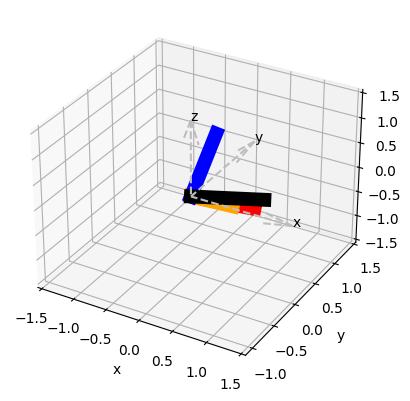

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
phi_i = phi_range_slider.value[0] * np.pi/180
phi_f = phi_range_slider.value[1] * np.pi/180
theta_i = theta_range_slider.value[0] * np.pi/180
theta_f = theta_range_slider.value[1] * np.pi/180
psi_i = psi_range_slider.value[0] * np.pi/180
psi_f = psi_range_slider.value[1] * np.pi/180

# these variables hold 50 values linearly spaced from the initial value to the final value to act as "time"
phi = np.linspace(phi_i, phi_f, num=50)
theta = np.linspace(theta_i, theta_f, num=50)
psi = np.linspace(psi_i, psi_f, num=50)# let's convert to rotation matrices from each Euler angle at each "time" step 
A_x = [None] * len(phi)
A_y = [None] * len(phi)
A_z = [None] * len(phi)
A_t = np.zeros([len(phi),9])

for i in range(0,len(phi)):
    A_x[i] = np.array([[1, 0, 0],
                      [0, np.cos(phi[i]), -np.sin(phi[i])], 
                      [0, np.sin(phi[i]), np.cos(phi[i])]])
    A_y[i] = np.array([[np.cos(theta[i]), 0, np.sin(theta[i])],
                      [0, 1, 0], 
                      [-np.sin(theta[i]), 0, np.cos(theta[i])]])
    A_z[i] = np.array([[np.cos(psi[i]), -np.sin(psi[i]), 0],
                      [np.sin(psi[i]), np.cos(psi[i]), 0], 
                      [0, 0, 1]])
    A = A_z[i] @ A_y[i] @ A_x[i]
    A_t[i,0] = A[0,0]
    A_t[i,1] = A[0,1]
    A_t[i,2] = A[0,2]
    A_t[i,3] = A[1,0]
    A_t[i,4] = A[1,1]
    A_t[i,5] = A[1,2]
    A_t[i,6] = A[2,0]
    A_t[i,7] = A[2,1]
    A_t[i,8] = A[2,2]
    # let's convert to Euler axis/angle from rotation matrices
theta_a = [None] * len(phi)
e_1 = [None] * len(phi)
e_2 = [None] * len(phi)
e_3 = [None] * len(phi)

for i in range(0,len(phi)):
    A_11 = A_t[i,0];    A_12 = A_t[i,1];    A_13 = A_t[i,2] 
    A_21 = A_t[i,3];    A_22 = A_t[i,4];    A_23 = A_t[i,5]
    A_31 = A_t[i,6];    A_32 = A_t[i,7];    A_33 = A_t[i,8]
    theta_a[i] = np.arccos((A_11+A_22+A_33-1)/2)
    e_1[i] = (A_32-A_23)/(2*np.sin(theta_a[i]))
    e_2[i] = (A_13-A_31)/(2*np.sin(theta_a[i]))
    e_3[i] = (A_21-A_12)/(2*np.sin(theta_a[i]))
# object initialization
ax.quiver(0, 0, 0, 1, 0, 0, length=1.5, linestyle = '--', normalize=True, color = '#BDBDBD') #red
ax.text(1.5, 0, 0, r'x', color = 'k')
ax.quiver(0, 0, 0, 0, 1, 0, length=1.5, linestyle = '--', normalize=True, color = '#BDBDBD') #orange
ax.text(0, 1.5, 0, r'y', color = 'k')
ax.quiver(0, 0, 0, 0, 0, 1, length=1.5, linestyle = '--', normalize=True, color = '#BDBDBD') #blue 
ax.text(0, 0, 1.5, r'z', color = 'k')
ax.set(xlim=(-1.5, 1.5), 
          ylim=(-1.1,1.5), 
          zlim=(-1.5,1.5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x_b, = ax.plot([0,A_t[0,0]], [0,A_t[0,3]], [0,A_t[0,6]], color = 'red', linewidth = 10)
y_b, = ax.plot([0,A_t[0,1]], [0,A_t[0,4]], [0,A_t[0,7]], color = 'orange', linewidth = 10)
z_b, = ax.plot([0,A_t[0,2]], [0,A_t[0,5]], [0,A_t[0,8]], color = 'blue', linewidth = 10)
e, = ax.plot([0,e_1[0]], [0,e_2[0]], [0,e_3[0]], color = 'black', linewidth = 10)

# animation function. This is called sequentially
def drawframe(n): 
    x_b.set_data([0,A_t[n,0]], [0,A_t[n,1]])
    x_b.set_3d_properties([0,A_t[n,2]], 'z')
    y_b.set_data([0,A_t[n,3]], [0,A_t[n,4]])
    y_b.set_3d_properties([0,A_t[n,5]], 'z')
    z_b.set_data([0,A_t[n,6]], [0,A_t[n,7]])
    z_b.set_3d_properties([0,A_t[n,8]], 'z')
    e.set_data([0,e_1[n]], [0,e_2[n]])
    e.set_3d_properties([0,e_3[n]], 'z')
    return (x_b, y_b, z_b, e);

anim = animation.FuncAnimation(fig, drawframe, frames=50, interval=20, blit=True)

HTML(anim.to_html5_video())